In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [2]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# 해수욕장 이용객 데이터 가져오기

df_sea2007 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/0423_태안영업소/해수욕장_이용_20230424162053.csv', encoding = 'cp949', header =0 )
df_sea2013 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/0423_태안영업소/해수욕장_이용_20230425154725.csv', encoding = 'cp949', header =0 )
df_sea2013 = df_sea2013.iloc[:,1:]
df_sea = pd.concat([df_sea2007, df_sea2013], axis =1)
df_sea.to_csv('/content/drive/MyDrive/Colab Notebooks/data/1차프로젝트_태안_뉴스/df_sea.csv')

# 해수욕장 이용객 데이터 가져오기 (년도별 정리)
df_sea = df_sea.iloc[:41,:]
df_sea = df_sea.loc[:,['해수욕장별(1)', '2007.6','2008.9','2009.9', '2010.9', '2011.9', '2012.9', '2013.9', '2014.9', '2015.9', '2016.9', '2017.9',
                       '2018.9', '2019.9', '2020.9']]
df_sea.columns = ['해수욕장별', '2007','2008','2009','2010','2011', '2012','2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
df_sea = df_sea.iloc[2:, :5]
df_sea.reset_index(drop = True, inplace = True)
df_sea = df_sea.set_index('해수욕장별')

df_sea = df_sea.apply(pd.to_numeric, errors='coerce')

In [4]:
# 통행량 데이터 가져오기

df_gosok = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/0424_통행소/df_gosok.csv')
df_gosok.drop(columns = ["Unnamed: 0"], inplace = True)
df_gosok.drop_duplicates(inplace=True)

In [5]:
# 통행량 년도 특정해서 분리

df_gosok.drop_duplicates(inplace=True)
df_gosok

,집계일자,영업소코드,1종교통량,2종교통량,년도,월,일,교통량
0,2005-01-01,277,4951,54,2005,1,1,5005
1,2005-01-01,11,42442,518,2005,1,1,42960
2,2005-01-01,11,41960,511,2005,1,1,42471
3,2005-01-01,53,21649,248,2005,1,1,21897
4,2005-01-01,53,21195,246,2005,1,1,21441
...,...,...,...,...,...,...,...,...
8197633,2023-03-31,217,1291,66,2023,3,31,1357
8197634,2023-03-31,217,184,22,2023,3,31,206
8197635,2023-03-31,217,1157,47,2023,3,31,1204
8197636,2023-03-31,219,3132,52,2023,3,31,3184


In [6]:
# 통행량 년도 특정해서 분리

df_gosok.drop_duplicates(inplace=True)
# df_gosok = df_gosok[ (df_gosok['년도']==2007)|(df_gosok['년도']==2008)|(df_gosok['년도']==2009)|(df_gosok['년도']==2010)   ] 

In [7]:
# 통행량 중 여름 통행량만 분리

df_summer = df_gosok[ (df_gosok['월']== 6) | (df_gosok['월']== 7) | (df_gosok['월']== 8) | (df_gosok['월']== 9) ]
df_summer.drop_duplicates(inplace=True)
# df_summer = df_summer[  (df_gosok['년도']==2007)|(df_gosok['년도']==2008)|(df_gosok['년도']==2009)|(df_gosok['년도']==2010)   ] 

<ipython-input-7-31a784b59f7f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summer.drop_duplicates(inplace=True)


In [8]:
len(df_summer['영업소코드'][ df_summer['년도'] == 2007 ].unique()), len(df_summer['영업소코드'][ df_summer['년도'] == 2008 ].unique())

(260, 283)

In [ ]:
df_grouped = df_gosok.groupby(['년도'])['교통량'].sum().reset_index()
df_grouped

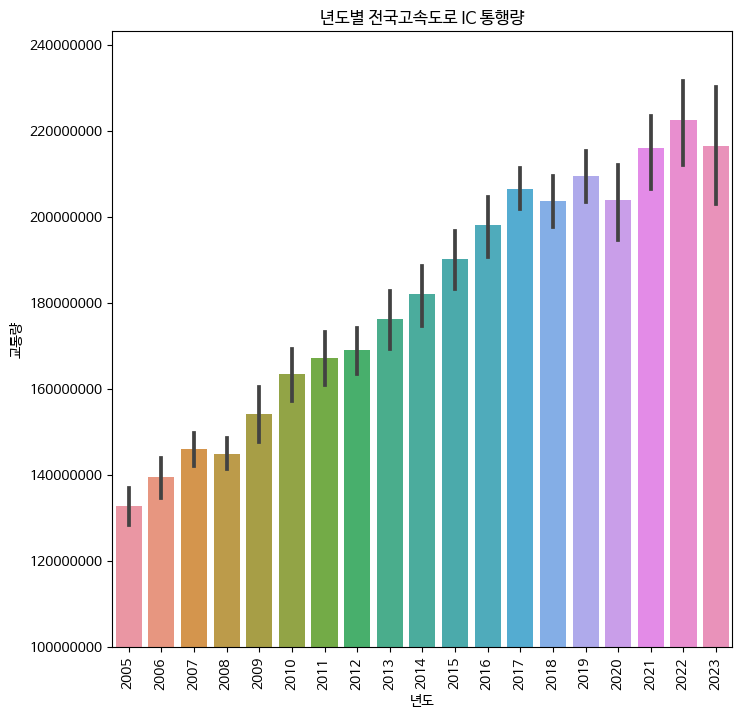

In [12]:
# sns.barplot(x='년도', y='교통량', data=df)
df_grouped = df_gosok.groupby(['년도', '월'])['교통량'].sum().reset_index()
plt.figure(figsize = (8,8))
# 막대그래프 그리기
sns.barplot(x='년도', y='교통량', data=df_grouped)

plt.title('년도별 전국고속도로 IC 통행량') 
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(100000000)
plt.xticks(rotation=90)

plt.show()

In [15]:
df_car_grouped = df_car.groupby(['년도'])['교통량'].sum().reset_index()
df_car_grouped
1491625/(1601977+1581282)/2

0.23429212011966352

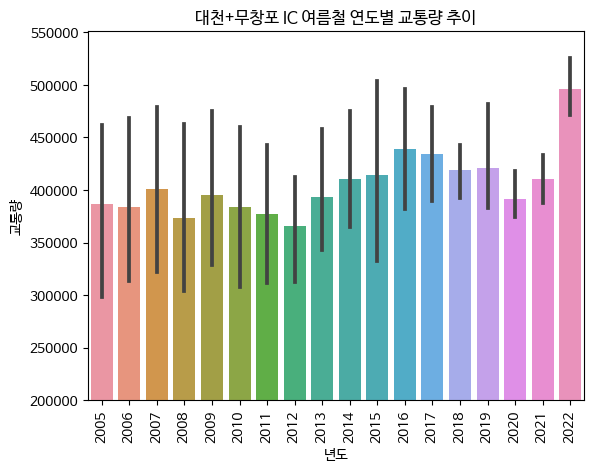

In [14]:
# 대천+무창포 IC 휴가철 통행량
df_car = df_summer[ (df_summer['영업소코드'] == 259) | (df_summer['영업소코드'] == 511)].reset_index(drop = True)
df_car_grouped = df_car.groupby(['년도', '월'])['교통량'].sum().reset_index()

sns.barplot(x='년도', y='교통량', data=df_car_grouped)
plt.title( '대천+무창포 IC 여름철 연도별 교통량 추이')
plt.xticks(rotation = 90)
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(200000)

plt.show()

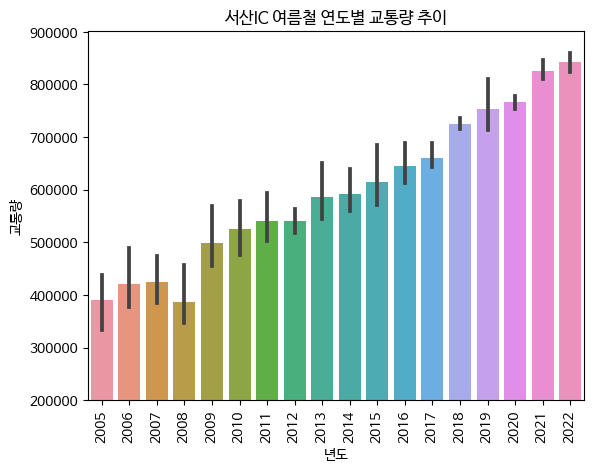

In [16]:
# 서산 IC 휴가철 통행량
df_car = df_summer[ df_summer['영업소코드'] == 298 ].reset_index(drop = True)
df_car_grouped = df_car.groupby(['년도', '월'])['교통량'].sum().reset_index()

sns.barplot(x='년도', y='교통량', data=df_car_grouped)
plt.title('서산IC 여름철 연도별 교통량 추이')
plt.xticks(rotation = 90)
plt.ylim(200000)

plt.show()


In [27]:
df_jiri_grouped = df_jiri.groupby(['년도'])['교통량'].sum().reset_index()

df_jiri_grouped
268124/(281136 +290154) /2 

0.23466540636104255

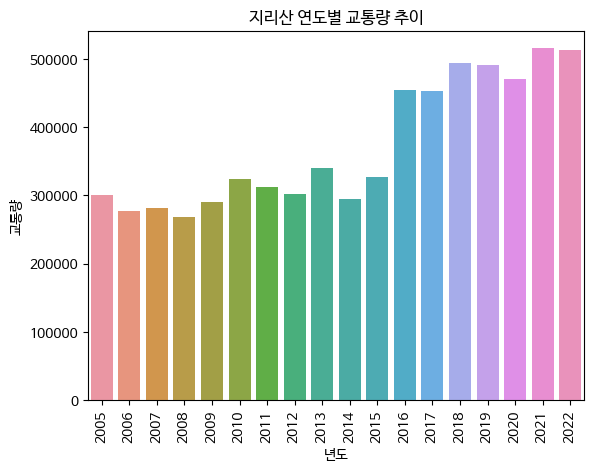

In [18]:
df_jiri = df_summer[ (df_summer['영업소코드'] == 269) ] 
df_jiri_grouped = df_jiri.groupby(['년도'])['교통량'].sum().reset_index()

# 막대그래프 그리기
sns.barplot(x='년도', y='교통량', data=df_jiri_grouped)
plt.title('지리산 연도별 교통량 추이')
plt.xticks(rotation = 90)

plt.show()


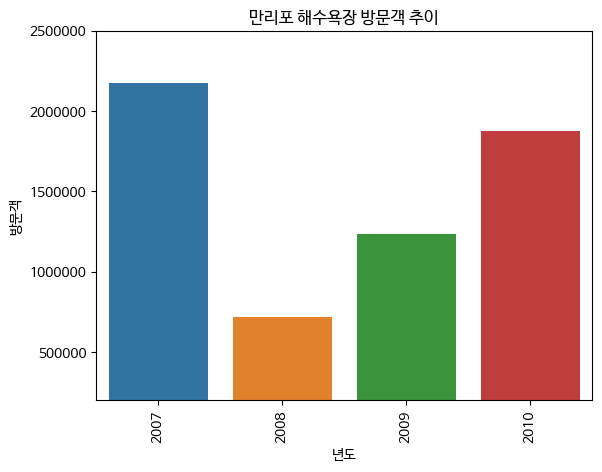

In [19]:

df_sea_people = df_sea.loc['만리포해수욕장']
df_sea_people = pd.DataFrame(df_sea_people)
df_sea_people.reset_index(inplace = True)
df_sea_people.columns = ["년도", '방문객']

# df_car = df_summer[ df_summer['영업소코드'] == 298 ].reset_index(drop = True)
# df_car_grouped = df_car.groupby(['년도', '월'])['교통량'].sum().reset_index()

sns.barplot(x='년도', y='방문객', data=df_sea_people)
plt.ticklabel_format(style='plain', axis='y')
plt.title('만리포 해수욕장 방문객 추이')
plt.xticks(rotation = 90)
plt.ylim(200000,2500000)

plt.show()

In [56]:
news_t

,년도,뉴스기사수
0,2008,9409
1,2009,1430
13,2010,947


In [58]:
1430/9409

0.15198214475502178

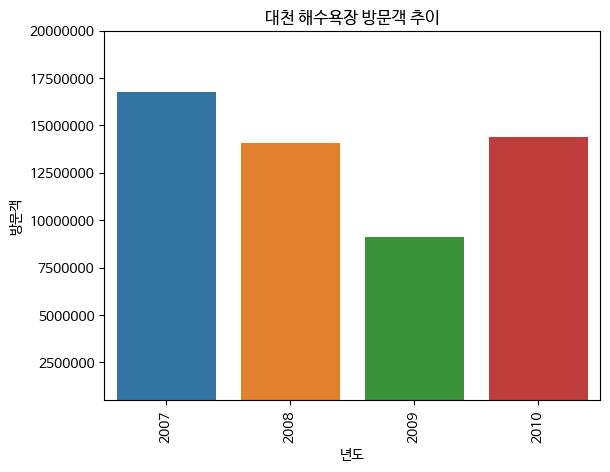

In [20]:
df_sea_people = df_sea.loc['대천해수욕장']
df_sea_people = pd.DataFrame(df_sea_people)
df_sea_people.reset_index(inplace = True)
df_sea_people.columns = ["년도", '방문객']

sns.barplot(x='년도', y='방문객', data=df_sea_people)
plt.ticklabel_format(style='plain', axis='y')
plt.title('대천 해수욕장 방문객 추이')
plt.xticks(rotation = 90)
plt.ylim(500000,20000000)

plt.show()

In [ ]:
df_sea_people

In [ ]:
14382110.0/16742511.0

In [ ]:
sns.regplot(data=df_seosan_grouped, x='년도', y='교통량',robust=True)
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='년도', y='교통량', data=df_gosok)
plt.title('영업소별 월별 교통량')
plt.show()

In [ ]:
import warnings

In [ ]:
df_grouped.head()

In [ ]:
df_seosan_grouped

In [26]:
# 해수욕장 상관관계 및 히트맵 분석


df_sea_people = df_sea.loc['만리포해수욕장']
df_sea_people = pd.DataFrame(df_sea_people)
df_sea_people.reset_index(inplace = True)
df_sea_people.columns = ["년도", '방문객']


df_manripo = df_manripo.merge(news_taean_grouped, how = 'left')
df_manripo = df_manripo.fillna(571)
sns.heatmap(df_manripo.corr(), cmap = 'summer', annot = True)
plt.show()

NameError: ignored

In [ ]:
# 노재팬 상관관계 및 히트맵 분석

sns.heatmap(df_uniqlo.corr(), cmap = 'summer', annot = True)


In [ ]:
import pandas as pd

df_manripo
# 두 데이터프레임을 합침
df_merged = pd.concat((df_manripo, df_uniqlo_4))
# 상관계수 행렬 계산
corr_matrix = df_merged.corr()
print(corr_matrix)


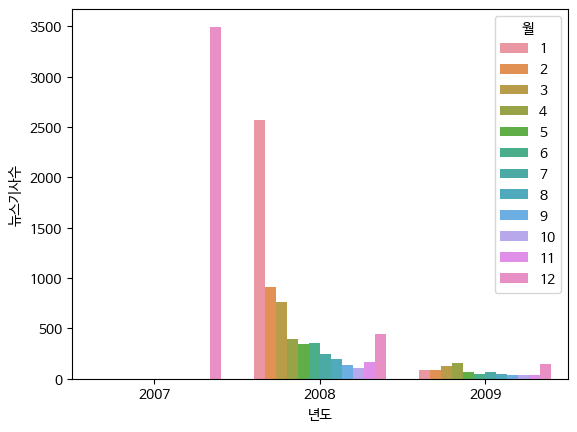

In [22]:
# 태안 뉴스 기사 

news_taean = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/1차프로젝트_태안_뉴스/Tae.csv')
news_taean = news_taean.iloc[:,1:]
news_taean.columns = ['년도', '월', '뉴스기사수']


# 태안 뉴스 컬럼 이름 변경
news_taean.columns = ['년도', '월', '뉴스기사수']
news_taean_grouped = news_taean.groupby(['년도', '월'])['뉴스기사수'].sum()

# 두 번째 서브플롯에 대한 바 차트 그리기
sns.barplot(x='년도', y='뉴스기사수', hue='월', data=news_taean_grouped.reset_index())


plt.show()

In [28]:
news_taean_grouped

,년도,뉴스기사수
0,2007,3496
1,2008,6625
2,2009,936


In [25]:
# 
# df_seosan_grouped['년도'] = df_seosan_grouped['년도'].astype(str)
news_taean_grouped['년도'] = news_taean_grouped['년도'].astype(str)

In [ ]:
# --------------세월호----------------

df_jeju = {"년도"  : ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
           "비행기 승객수" : [15301941, 17110602, 19268232, 21160741, 21465025, 20526958, 20957815, 15184105, 18378510, np.nan],
           "여객선 승객수" : [1303404, 1255261, 1560073, 1630941, 2112974, 1566178, 1943010, 1305745, 1588287,np.nan],
           "관광객수" : [8517417, 8945601, 11040135, 12254550, 13522632, 13089129, 13560004, 10023678, 11960159, 13803058]}

In [ ]:
df_jeju = pd.DataFrame(df_jeju)

In [ ]:

df_jeju = df_jeju.set_index('년도')

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.bar(df_jeju.index, df_jeju['비행기 승객수'], color='red', alpha=0.5, label='Number of Passengers by Plane')
ax1.set_title('Jeju Island Tourists by Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Passengers by Plane')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.bar(df_jeju.index, df_jeju['여객선 승객수'], color='blue', alpha=0.5, label='Number of Passengers by Ship')
ax2.set_ylabel('Number of Passengers by Ship')
ax2.legend(loc='upper right')

ax3 = ax1.twinx()
ax3.plot(df_jeju.index, df_jeju['관광객수'], color='green', alpha=0.7, label='Number of Tourists')
ax3.set_ylabel('Number of Tourists')
ax3.spines['right'].set_position(('axes', 1.1))
ax3.yaxis.set_label_coords(1.2, 0.5)
ax


In [ ]:
# --------------세월호----------------

In [ ]:
import matplotlib.pyplot as plt

# 데이터
labels = ['이미지 손상을 주었다', '이미지 손상을 주지 않았다', '잘 모르겠다']
sizes = [87.3, 9.7, 3]

# 파이 그래프 그리기
plt.pie(sizes, labels=labels, autopct='%.1f%%', startangle=90)

# 그래프 타이틀 추가
plt.title('태안 이미지 인식 변화')

# 그래프 출력
plt.show()


In [34]:
temp1,temp2, temp3 = [], [], []
temp1 = news_taean.iloc[:10,2].sum()
temp2 = news_taean.iloc[10:22,2].sum()
temp3 = news_taean.iloc[22:,2].sum()
temp3 = temp3+729

In [ ]:
news_taean

In [23]:
news_taean_grouped = news_taean.groupby(['년도'])['뉴스기사수'].sum().reset_index()

In [55]:
news_t = news_taean.drop(columns = ['월'])
news_t  =  news_t.iloc[[0,1,13],:]
news_t.iloc[0,1] = temp1
news_t.iloc[1,1] = temp2
news_t.iloc[2,1] = temp3
news_t
news_t.iloc[0,0] = "2008"
news_t.iloc[1,0] = "2009"
news_t.iloc[2,0] = "2010"
news_t

,년도,뉴스기사수
0,2008,9409
1,2009,1430
13,2010,947


In [36]:
news_taean.columns

Index(['년도', '월', '뉴스기사수'], dtype='object')

In [ ]:
df_sea_people = df_sea.reset_index()
df_manri = df_sea_people.iloc[7,1:5]
df_manri = pd.DataFrame(df_manri)
df_manri = df_manri.reset_index()

In [ ]:
df_manri

In [ ]:
# 유니클로 데이터

df_uniqlo = {"년도" : ["2018", "2019", "2020", "2021", "2022"],
             "매출액" : [13732, 13781, 6298, 5824, 7043],
             "영업이익" : [2343 ,1994, -884, 529, 1148],
             "기사수" : [np.nan, 44952,10235,4072,1879]}
df_uniqlo = pd.DataFrame(df_uniqlo)


In [65]:
6298/13781

0.45700602278499386

In [66]:
(10235)/44952

0.2276873109094145

In [ ]:
# 유니클로 그래프

fig, ax = plt.subplots(figsize=(10, 10))

ax.bar(x = "년도", height = "매출액", data = df_uniqlo, color='red', alpha=0.5, label='매출액')

ax.plot(df_uniqlo["년도"], df_uniqlo["영업이익"], color='green', alpha=0.8, label='영업이익')
ax.plot(df_uniqlo["년도"], df_uniqlo["기사수"], color='blue', alpha=0.8, label='기사수')

ax.set_title('유니클로의 년도별 매출액 및 영업이익')
plt.show()

In [ ]:
# 유니클로 기사수 데이터

df_nojapan = { "년도" : [2019, 2020, 2021, 2022],
              "기사수" : [44952,10235,4072,1879]
              }

df_nojapan = pd.DataFrame(df_nojapan)

In [ ]:
3962+3971+3979+3779+3446+3726+3412+3291+3667+3169+3739+3601+1210

In [ ]:

import matplotlib.pyplot as plt

df_nojapan.plot(x='년도', y='기사수', kind='bar')
plt.show()


In [77]:
df_itawon = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/1차 프로젝트_이태원_지하철/이태원_지하철 이용객.csv')
df_itawon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2281 entries, 0 to 2280
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2281 non-null   int64  
 1   사용일자        2281 non-null   float64
 2   노선명         2281 non-null   object 
 3   역명          2281 non-null   object 
 4   승차총승객수      2281 non-null   float64
 5   하차총승객수      2281 non-null   int64  
 6   등록일자        2281 non-null   float64
 7   년도          2281 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 142.7+ KB


In [ ]:
df_itawon = df_itawon.drop(columns = ['Unnamed: 0'])


In [82]:
df_itawon['사용일자'].astype(int)
df_itawon['승차총승객수'].astype(int)

# '집계일자' 열을 datetime 타입으로 변환
df_itawon['사용일자'] = pd.to_datetime(df_itawon['사용일자'], format='%Y%m%d')

# '년도', '월', '일' 열 생성
df_itawon['년도'] = df_itawon['사용일자'].dt.year
df_itawon['월'] = df_itawon['사용일자'].dt.month
df_itawon['일'] = df_itawon['사용일자'].dt.day
df_itawon = df_itawon[ (df_itawon['년도']==2022) | (df_itawon['년도']==2023) ].reset_index(drop = True)
df_itawon['총승객수'] = df_itawon['승차총승객수'] + df_itawon['하차총승객수']
df_itawon.groupby(['년도'], ['월'])['총승객수'].sum()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,년도,월,일,총승객수
0,2022-01-01,6호선,이태원,7952.0,7914,20220104.0,2022,1,1,15866.0
1,2022-01-02,6호선,이태원,7271.0,6801,20220105.0,2022,1,2,14072.0
2,2022-01-03,6호선,이태원,8093.0,7947,20220106.0,2022,1,3,16040.0
3,2022-01-04,6호선,이태원,8286.0,8343,20220107.0,2022,1,4,16629.0
4,2022-01-05,6호선,이태원,8686.0,8739,20220108.0,2022,1,5,17425.0
...,...,...,...,...,...,...,...,...,...,...
450,2023-03-27,6호선,이태원,10852.0,10876,20230330.0,2023,3,27,21728.0
451,2023-03-28,6호선,이태원,11457.0,11489,20230331.0,2023,3,28,22946.0
452,2023-03-29,6호선,이태원,11408.0,11711,20230401.0,2023,3,29,23119.0
453,2023-03-30,6호선,이태원,11611.0,11975,20230402.0,2023,3,30,23586.0


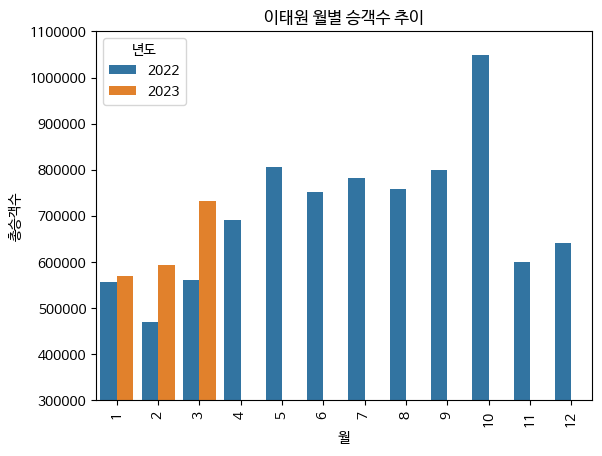

In [94]:
# df_itawon.groupby( ['년도', '월'] )['총승객수'].sum()
df_itawon_grouped = df_itawon.groupby(['년도', '월'])['총승객수'].sum().reset_index()

# 막대그래프 그리기
sns.barplot(x='월', y='총승객수',hue = '년도', data=df_itawon_grouped)
plt.title('이태원 월별 승객수 추이')
plt.xticks(rotation = 90)
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(300000)
plt.show()

In [102]:
df_itawon_grouped = df_itawon_grouped.iloc[9:,:]

In [96]:
600627.0/1048657.0

0.5727582994248834

In [98]:
news_i = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/1차프로젝트_태안_뉴스/month_Itaewon.csv')

In [100]:
news_i.columns = ['년도', '월', '뉴스개수']

In [101]:
news_i

,년도,월,뉴스개수
0,2022,10,3385
1,2022,11,2890
2,2022,12,2716
3,2023,1,2625
4,2023,2,2356
5,2023,3,1851
6,2023,4,1698


In [103]:
df_itawon_grouped

,년도,월,총승객수
9,2022,10,1048657.0
10,2022,11,600627.0
11,2022,12,642320.0
12,2023,1,569339.0
13,2023,2,592981.0
14,2023,3,731831.0


In [109]:
df_merged


,년도_x,월,뉴스개수,년도_y,총승객수
0,2022,10,3385,2022,1048657.0
1,2022,11,2890,2022,600627.0
2,2022,12,2716,2022,642320.0
3,2023,1,2625,2023,569339.0
4,2023,2,2356,2023,592981.0
5,2023,3,1851,2023,731831.0


In [111]:
import pandas as pd

# df_manripo
# 두 데이터프레임을 합침
df_merged = news_i.merge(df_itawon_grouped, on='월')

# 상관계수 행렬 계산
corr_matrix = df_merged.corr()
print(corr_matrix)


          년도_x         월      뉴스개수      년도_y      총승객수
년도_x  1.000000 -0.983935 -0.765241  1.000000 -0.400344
월    -0.983935  1.000000  0.641115 -0.983935  0.340207
뉴스개수 -0.765241  0.641115  1.000000 -0.765241  0.509227
년도_y  1.000000 -0.983935 -0.765241  1.000000 -0.400344
총승객수 -0.400344  0.340207  0.509227 -0.400344  1.000000


In [ ]:
1. 크롤링


# 간략화

#크롤링시 필요한 라이브러리 불러오기
from bs4 import BeautifulSoup
import requests
import re
import datetime
from tqdm import tqdm
import sys
import time
import pandas as pd

# 크롤링할 url 생성하는 함수 만들기(검색어, 시작 날짜, 종료 날짜, 최대 페이지)
def makeUrl(search, s_date, e_date, maxpage):
    s_from = s_date.replace(".","")
    e_to = e_date.replace(".","")
    url = [f'''https://search.naver.com/search.naver?where=news
                &query={search}&sort=0&ds={s_date}&de={e_date}
                &nso=so%3Ar%2Cp%3Afrom{s_from}to{e_to}%2Ca%3A&start={i}''' 
                for i in range(1, int(maxpage) * 10, 10)]
    return url  

# html에서 원하는 속성 추출하는 함수 만들기(기사, 추출하려는 속성값)
def news_attrs_crawler(articles, attrs):
    attrs_content = [i.attrs[attrs] for i in articles]
    return attrs_content

# ConnectionError방지
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chrome/98.0.4758.102"}

#html 생성해서 기사 크롤링하는 함수 만들기(url): 링크를 반환
def articles_crawler(url):
    #html 불러오기
    original_html = requests.get(i,headers=headers)
    html = BeautifulSoup(original_html.text, "html.parser")

    url_naver = html.select('''div.group_news > ul.list_news > li div.news_area > 
                               div.news_info > div.info_group > a.info''')
    url = news_attrs_crawler(url_naver,'href')
    return url


#####뉴스 크롤링 시작#####
search = input("검색어 입력: ")  
s_date = input("시작 날짜 입력(예시: 2019.01.04): ")  #2019.01.04
e_date = input("종료 날짜 입력(예시: 2019.01.05): ")   #2019.01.05
maxpage = input("최대 크롤링할 페이지 수를 입력하세요: ")

# naver url 생성
url = makeUrl(search, s_date, e_date, maxpage)

#뉴스 크롤러 실행
news_titles = []
news_url =[]
news_contents =[]
news_dates = []
news_names = []
for i in url:
    url = articles_crawler(url)
    news_url.append(url)


#제목, 링크, 내용 1차원 리스트로 꺼내는 함수 생성
def makeList(newlist, content):
    for i in content:
        for j in i:
            newlist.append(j)
    return newlist

    
#제목, 링크, 내용 담을 리스트 생성
news_url_1 = []

#1차원 리스트로 만들기(내용 제외)
makeList(news_url_1,news_url)

#NAVER 뉴스만 남기기
final_urls = []
for i in tqdm(range(len(news_url_1))):
    if "news.naver.com" in news_url_1[i]:
        final_urls.append(news_url_1[i])
    else:
        pass


# 뉴스 날짜 크롤링
for i in tqdm(final_urls):
    #각 기사 html get하기
    news = requests.get(i,headers=headers)
    news_html = BeautifulSoup(news.text,"html.parser")

    time.sleep(2)

    # html 태그 제거 및 텍스트 다듬기
    pattern1 = '<[^>]*>' # 태그 제거
    pattern2 = r'[\n\t<>]|&lt;|&gt;' # 특수 기호 제거

# 날짜 가져 오기
    try:
        html_date = news_html.select_one('''div#ct> div.media_end_head.go_trans > 
                                            div.media_end_head_info.nv_notrans > 
                                            div.media_end_head_info_datestamp > 
                                            div > span''')
        news_date = html_date.attrs['data-date-time'][:10]
    except AttributeError:
        news_date = news_html.select_one('''#content > div.end_ct > div > 
                                            div.article_info > span > em''')
        news_date = re.sub(pattern=pattern1,repl='', string=str(news_date))

    # news_dates.append(news_date)
    news_dates.append(news_date[:10].replace('.', '-'))


###데이터 프레임으로 만들기###

# #데이터 프레임 만들기
news_df = pd.DataFrame({'date':news_dates, 'link': final_urls})

# #중복 행 지우기
news_df = news_df.drop_duplicates(keep='first', ignore_index=True)

# 데이터 저장
news_df.to_csv('./filename.csv')    






2. 태안 데이터 코드

#---------------------------------------------<크롤링한 csv파일 concat>------------------------------------
import pandas as pd
from glob import glob
import datetime

# 파일 경로 - 리스트에 저장
df = glob('/content/drive/MyDrive/MyLibrary/Taean/*.csv')

# 파일 불러오기
df = [pd.read_csv(i) for i in df]

# 파일 합치기
df = pd.concat(df)

# 'Unnamed: 0'컬럼명 제거
df = df.drop(['Unnamed: 0','name','title','content'],axis=1)

# 중복제거
df = df.drop_duplicates()

# 파일 저장
df.to_csv('/content/drive/MyDrive/MyLibrary/Taean/Taean_Nondate.csv')

#-------------------------------------<비어있는 날짜 채우고 시계열로 바꾸기>---------------------------------------------------------------

# 저장한 파일 불러오기
Taean = pd.read_csv('/content/drive/MyDrive/MyLibrary/Taean/Taean_date.csv')

# date를 시계열로 바꾸어 연도별,월별로 컬럼 나누기
Taean['year'] = pd.to_datetime(Taean['date'], format='%Y-%m-%d').dt.year
Taean['month'] = pd.to_datetime(Taean['date'], format='%Y-%m-%d').dt.month

# "date","link"컬럼명 제거
Taean = Taean.drop(["date"],axis=1)

# 연도 기준으로 월별로 정렬
Taean = Taean.sort_values(['year','month'])

# 연도와 월별 기준으로 월별 count
Taean = Taean.groupby(["year","month"])["month"].count()

# 파일 저장
Taean.to_csv('/content/drive/MyDrive/MyLibrary/Taean/Taean.csv')

#-----------------------------------<연도,월별 나누기-그룹바이 상태에서 파일 저장후 다시 불러옴>---------------------------------------

# 저장한 파일 불러오기
Taean = pd.read_csv('/content/drive/MyDrive/MyLibrary/Taean/Taean.csv')

# 컬럼명 바꾸기 - 'month.1' ->  'total'
Taean['total'] = Taean['month.1']

# 'month.1' 컬럼명 제거
Taean = Taean.drop('month.1',axis=1)

# 데이터 값 합치기
Taean_0708 = Taean["total"][:10].sum()    # 2007.12 ~ 2008.09
Taean_0809 = Taean["total"][10:22].sum()  # 2008.10 ~ 2009.09
Taean_0910 = Taean["total"][22:].sum()    # 2009.10 ~ 2010.09

# 데이터 프레임 생성
Tae = pd.DataFrame({'total':[Taean_0708,Taean_0809,Taean_0910]},
                   index = ["2008","2009","2010"])

# 파일 저장
Tae.to_csv('/content/drive/MyDrive/MyLibrary/Taean/Tae.csv')

#------------------------------< 그래프 >--------------------------------------------

# 한글 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
Tae.plot.bar()

plt.legend(['기사 갯수'])

# x축 레이블 설정
plt.xlabel('연도')

# y축 레이블 설정
plt.ylabel('기사 크롤링수')

plt.xticks(rotation=360)
plt.title( '태안 기름 유출 기사 크롤링')

plt.show()




3. 이태원 데이터 코드


#---------------------------------------------<크롤링한 csv파일 concat>------------------------------------
import pandas as pd
from glob import glob
import datetime

# 파일 경로 - 리스트에 저장
df = glob('/content/drive/MyDrive/MyLibrary/Itaewon/*.csv')

# 파일 불러오기
df = [pd.read_csv(i) for i in df]

# 파일 합치기
df = pd.concat(df)

# 'Unnamed: 0'컬럼명 제거
df = df.drop(['Unnamed: 0'],axis=1)

# 중복제거
df = df.drop_duplicates()

# 파일 저장
df.to_csv('/content/drive/MyDrive/MyLibrary/Taean/Itaewon_Nondate.csv')

#-------------------------------------<비어있는 날짜 채우고 시계열로 바꾸기>---------------------------------------------------------------

# 저장한 파일 불러오기
Itaewon = pd.read_csv('/content/drive/MyDrive/MyLibrary/Itaewon/Itaewon_date.csv')

# date를 시계열로 바꾸어 연도별,월별로 컬럼 나누기
Itaewon['year'] = pd.to_datetime(Itaewon['date'], format='%Y-%m-%d').dt.year
Itaewon['month'] = pd.to_datetime(Itaewon['date'], format='%Y-%m-%d').dt.month

# "date","link"컬럼명 제거
Itaewon = Itaewon.drop(["date"],axis=1)

# 연도 기준으로 월별로 정렬
Itaewon = Itaewon.sort_values(['year','month'])

# 연도와 월별 기준으로 월별 count
Itaewon = Itaewon.groupby(["year","month"])["month"].count()

# 파일 저장
Itaewon.to_csv('/content/drive/MyDrive/MyLibrary/Itaewon/Itaewon.csv')

#-----------------------------------<연도,월별 나누기-그룹바이 상태에서 파일 저장후 다시 불러옴>---------------------------------------

# 저장한 파일 불러오기
Itaewon = pd.read_csv('/content/drive/MyDrive/MyLibrary/Itaewon/Itaewon.csv')

# 컬럼명 바꾸기 - 'month.1' ->  'total'
Itaewon['total'] = Itaewon['month.1']

# 'month.1' 컬럼명 제거
Itaewon = Itaewon.drop('month.1',axis=1)

# 데이터 값 합치기
Itaewon_2022 = Itaewon.loc[:2].sum()[2]
Itaewon_2023 = Itaewon.loc[3:].sum()[2]

# 데이터 프레임 생성
Itaewon_year = {'2022': [Itaewon_2022], '2023': [Itaewon_2023]}
Itaewon_year = pd.DataFrame(Itaewon_year)
Itaewon = Itaewon_year.T

# 파일 저장
Itaewon.to_csv('/content/drive/MyDrive/MyLibrary/Itaewon/Itaewon.csv')

#------------------------------< 그래프 >--------------------------------------------

# 한글 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
Tae.plot.bar()

plt.legend(['기사 갯수'])

# x축 레이블 설정
plt.xlabel('연도')

# y축 레이블 설정
plt.ylabel('기사 크롤링수')

plt.xticks(rotation=360)
plt.title( '이태원 참사 기사 크롤링')

plt.show()

